In [79]:
import pysd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections as cl
import math

In [80]:
vensimDirectory='./Simulation Files/Prosumers & defectors'
vensimFile ='net metering-no fixed tariff.mdl'
filepath = Path(vensimDirectory,vensimFile)
model = pysd.read_vensim(str(filepath))

In [81]:
period_range=[]
period_range+=[1,3]
period_range+=list(range(6,36,6))
print(period_range)

[1, 3, 6, 12, 18, 24, 30]


## Search Variables

In [82]:
doc = model.doc()
doc.loc[doc['Real Name'].str.contains('elasticity'),['Real Name','Eqn']]

,Real Name,Eqn
104,price elasticity of prosumers,b'-0.2'
105,price elasticity of regular consumers,b'-0.1'


### Declare important variables:
Using a List for important variables such as:
* Electricity Tariff
* Budget Deficit
* Utility Energy Sale
* Consumer Numbers
    1. Regular Consumers
    2. Prosumers
    3. Defectors 
    4. Total
* Monthly Average Demand
    1. Regular Consumers
    2. Prosumers

In [83]:
important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','NPV PV','Total Consumers','Defectors','Regular Consumers','Prosumers','Regular Consumer Average Demand', 'Prosumer Average Demand','Regular Consumers Demand','Prosumers Demand']

In [84]:
paramaters={
    'population growth rate':0.001,
    'time to adjust Prosumer Demand':1,
    'time to adjust Regular Consumer demand':1,
    # 'price elasticity of prosumers':0,
    # 'price elasticity of regular consumers':0
}

collecting the results in a *Dictionary* of *Pandas Dataframe*

In [85]:
select_result=cl.defaultdict(pd.DataFrame)
all_result={}
for p in period_range:
    all_result[p] = model.run(params=paramaters|{'Tariff Correction Period':p})
    for v in important_vars:
        select_result[v][p]=all_result[p][v]

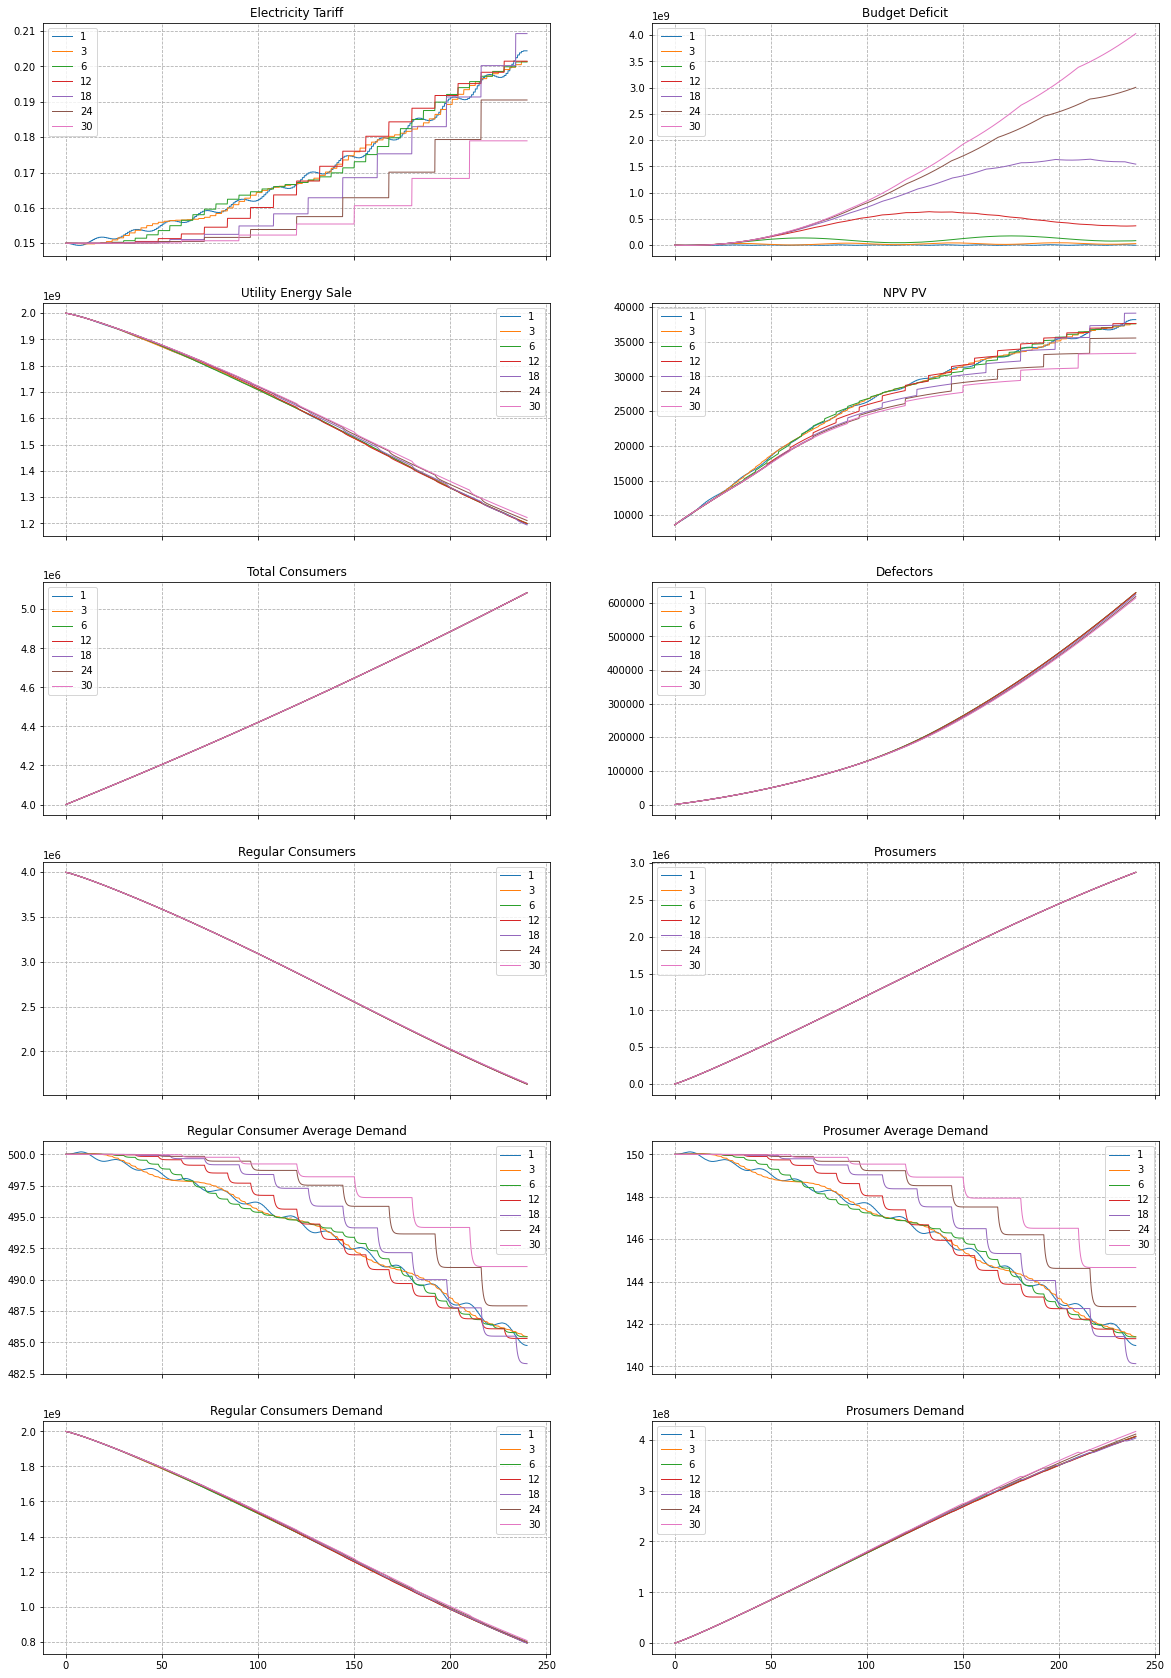

In [86]:
mpl.rc('lines',linewidth=1)  
n_rows= math.ceil(len(important_vars)/2)
fig,ax =plt.subplots(n_rows,2,sharex=True)
fig.set_size_inches(20,n_rows*5)
for i,v in enumerate(important_vars):
    cur_ax=ax[i//2,i%2]
    select_result[v].plot(ax=cur_ax)
    cur_ax.grid(True,linestyle='--')
    cur_ax.title.set_text(v)
    # if i in [0,1,3]:
    #     cur_ax.set_yscale('symlog')

### Prosumers Demand Analysis

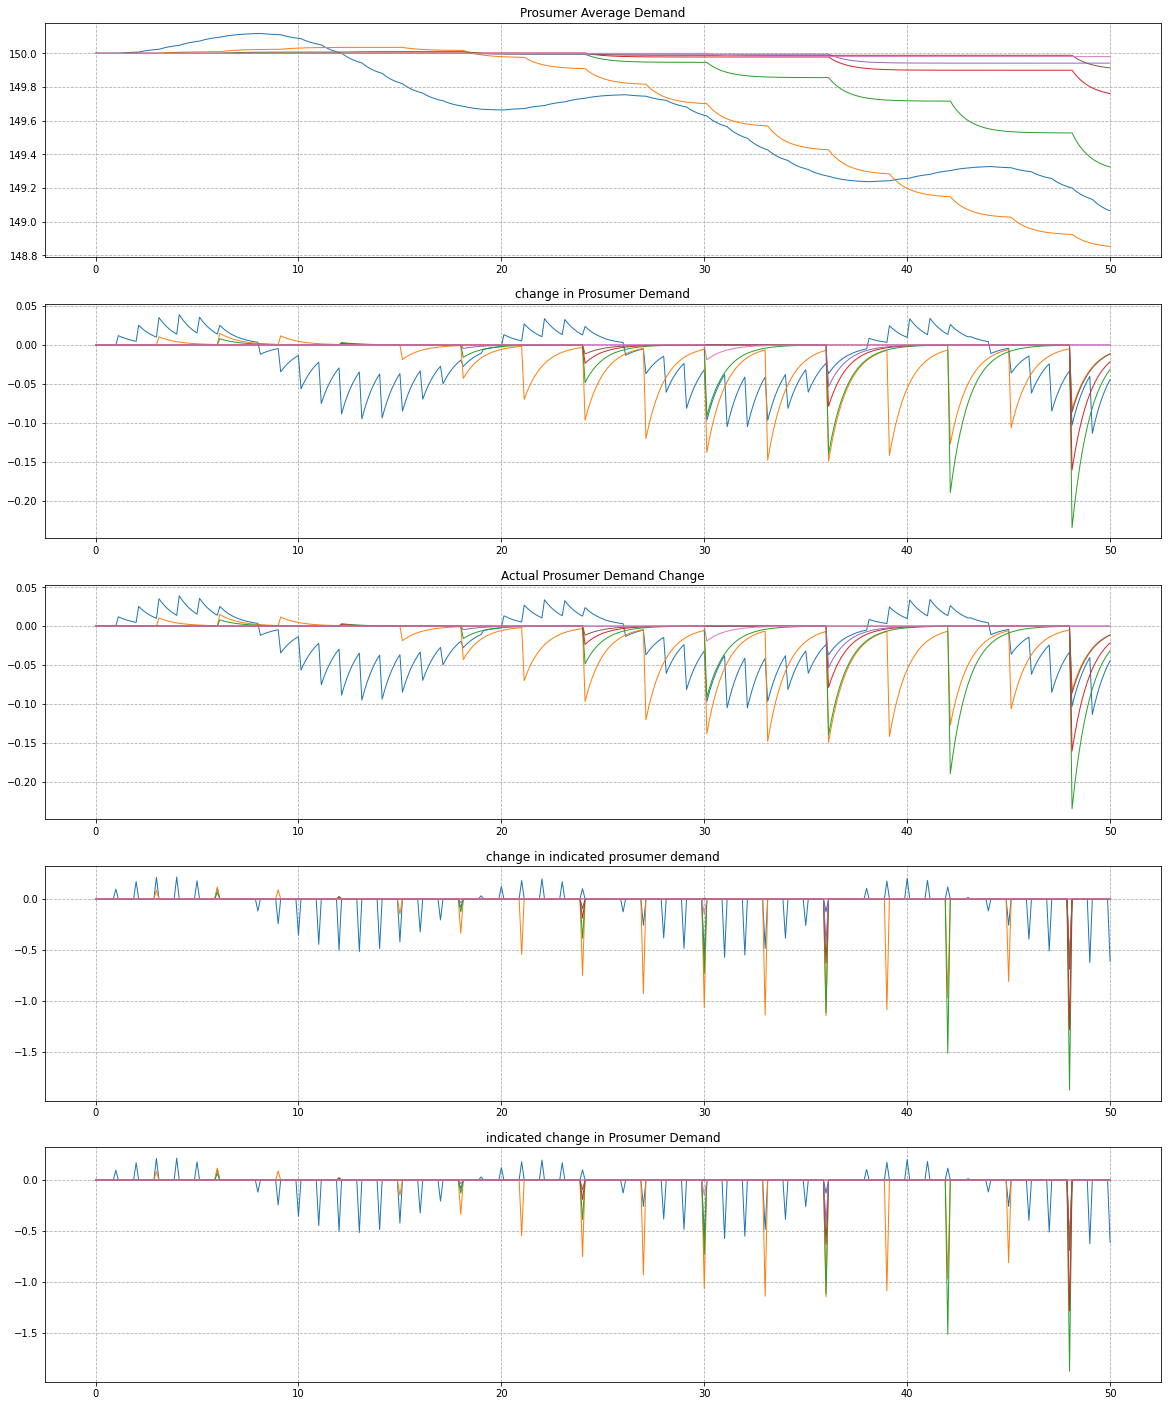

In [87]:
prosumer_demand_vars=['Prosumer Average Demand','change in Prosumer Demand','Actual Prosumer Demand Change','change in indicated prosumer demand','indicated change in Prosumer Demand']
fig,ax =plt.subplots(len(prosumer_demand_vars),1)
fig.set_size_inches(20,len(prosumer_demand_vars)*5)
for i,v in enumerate(prosumer_demand_vars):
    for p in period_range:
        ax[i].plot(all_result[p].loc[:50,v])
        ax[i].grid(True,linestyle='--')
        ax[i].title.set_text(v)


### Electricity Price Deconstruction

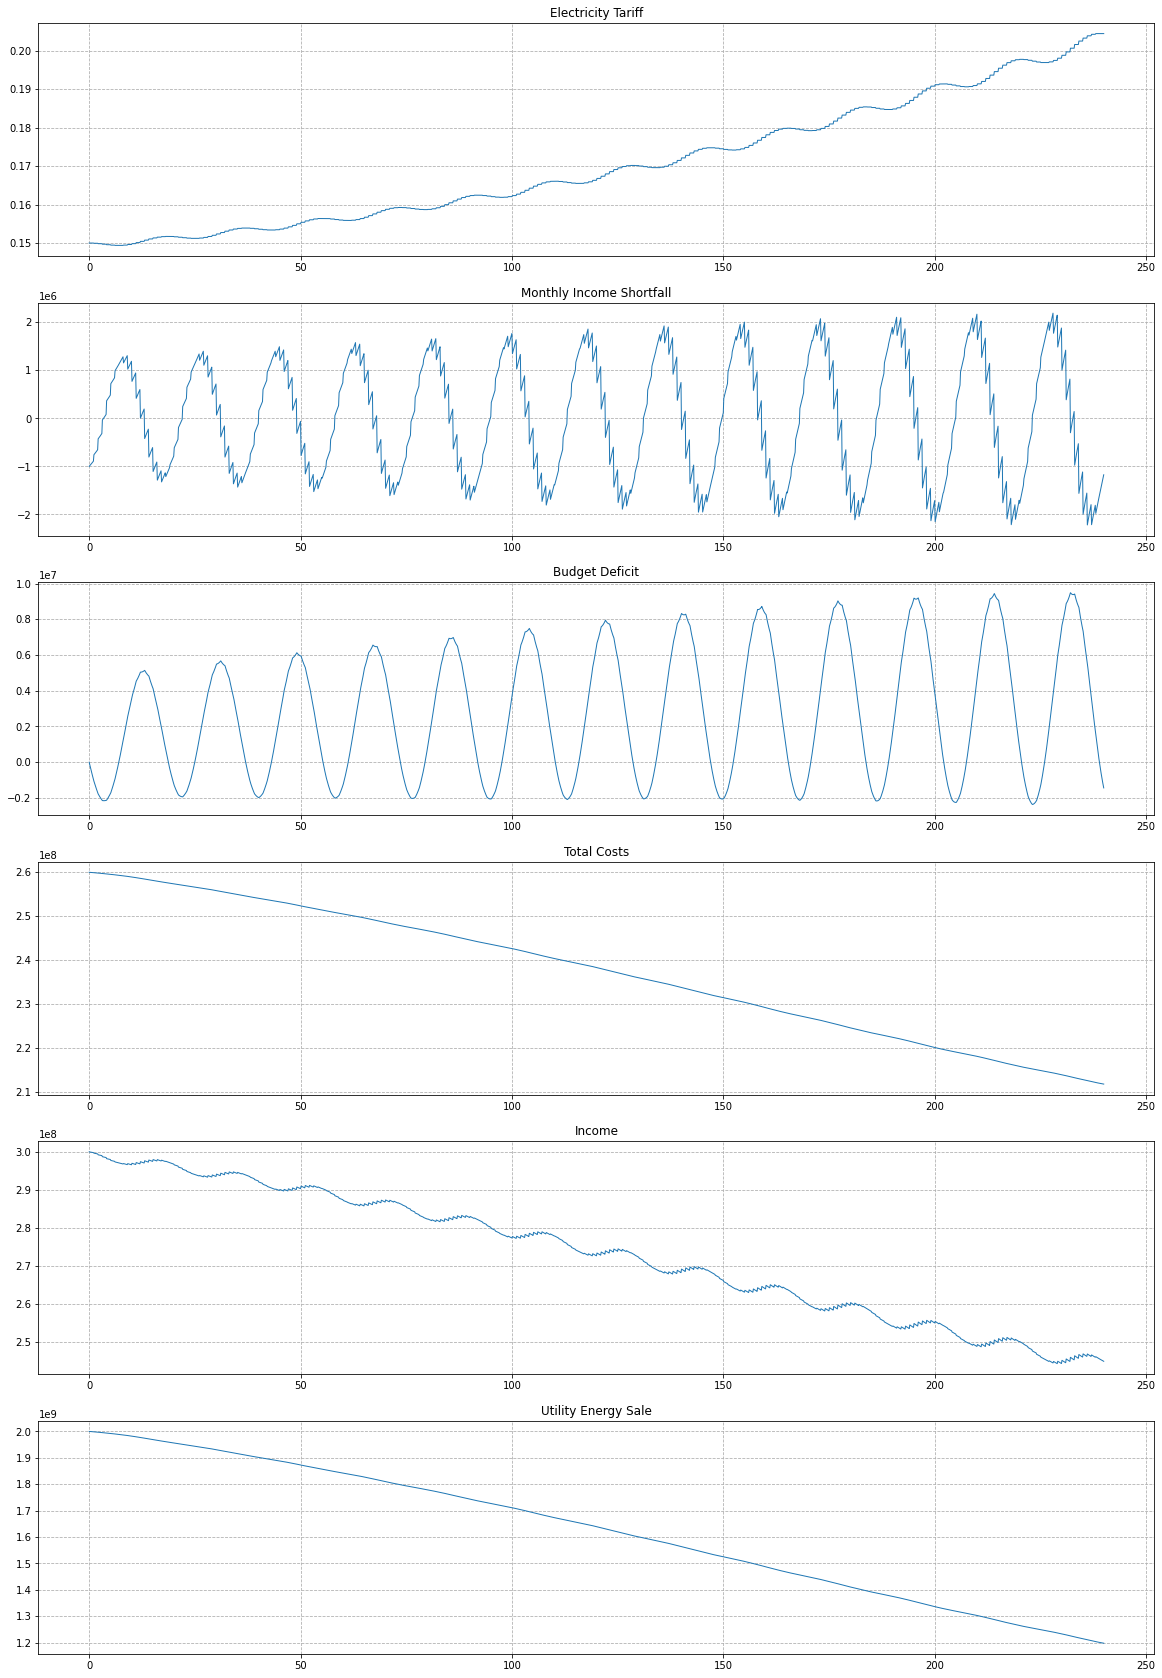

In [88]:
tariff_demand_vars=['Electricity Tariff','Monthly Income Shortfall','Budget Deficit','Total Costs','Income','Utility Energy Sale']
fig,ax =plt.subplots(len(tariff_demand_vars),1)
fig.set_size_inches(20,len(tariff_demand_vars)*5)
for i,v in enumerate(tariff_demand_vars):
    for p in [1]:
        ax[i].plot(all_result[p].loc[:,v])
        ax[i].grid(True,linestyle='--')
        ax[i].title.set_text(v)
        # ax[i].set_yscale('symlog')

In [89]:
tarif_change = pd.DataFrame({v:all_result[v]['change in electricity tariff'].astype('float64') for v in all_result})

In [90]:
normalized_tariff_change = tarif_change / select_result['Electricity Tariff']

<AxesSubplot:>

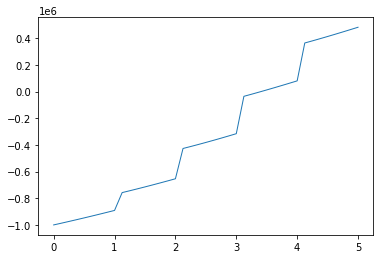

In [91]:
all_result[1].loc[:5,'Monthly Income Shortfall'].plot()